# Mapping Gal4 expression data
This module is for comparing the expression of yeast gene after galactose inductions for promoters with and without a Gal4 site 

Written by D.S.

In [ ]:

from analyze_sig_hits_v2 import *

### Modifes a significant promoter file to include PWM info

In [59]:
sig_hits = pd.read_csv("/sig_prom_Gal4_FL_Final.txt",sep="\t")

In [60]:
sig_hits.drop(['Unnamed: 0','Unnamed: 26','Unnamed: 27'],axis=1,inplace = True)

In [61]:
sig_hits = add_seq_to_frame(sig_hits)

In [62]:
sig_hits = add_pwm_info(sig_hits,'gal4',13.01)

In [63]:
sig_hits.index = sig_hits["Intergenic Region"]

In [64]:
sig_hits.drop(['Intergenic Region'],axis=1,inplace = True)

In [65]:
sig_hits.head()

,Chr,Start,End,Left Feature,Right Feature,Left Common Name,Right Common Name,TPH,Log TPH,TPH BS,...,Background Hops Lax,Experiment Hops Lax,TPH Lax,TPH Lax BS,CHG pvalue Lax,Poisson pvalue Lax,Sequence,gal4 pos,gal4 score,gal4 orientaion
Intergenic Region,,,,,,,,,,,,,,,,,,,,,
Chr12: 289251-290213,12,289251,290213,YLR080W,YLR081W,EMP46,GAL2,5293.505722,12.370008,5223.260730,...,77,1791,5323.227820,5249.133788,0.000000e+00,0.0,"(T, G, C, C, A, A, G, C, T, G, T, A, T, G, G, ...","[713, 716, 796]","[12.27, 11.64, 16.12]","[-1, 1, -1]"
Chr2: 275527-276253,2,275527,276253,YBR018C,YBR019C,GAL7,GAL10,4190.815872,12.033015,4150.400945,...,49,1431,4253.232278,4206.081531,1.800000e-10,0.0,"(C, A, T, A, C, A, A, T, G, G, A, G, C, T, G, ...","[327, 414]","[13.49, 12.72]","[1, 1]"
Chr11: 613527-615372,11,613527,615372,YKR092C,YKR093W,SRP40,PTR2,3257.541982,11.669568,3173.825349,...,91,1096,3257.541982,3169.976308,1.330000e-10,0.0,"(C, G, C, C, G, C, T, A, G, A, A, C, T, G, G, ...",[],[],[]
Chr11: 229524-231871,11,229524,231871,YKL110C,YKL109W,KTI12,HAP4,2603.655818,11.346323,2484.335559,...,124,876,2603.655818,2484.335559,0.000000e+00,0.0,"(T, T, A, T, G, C, C, T, A, A, A, G, A, T, T, ...",[],[],[]
Chr4: 1488983-1490589,4,1488983,1490589,YDR524C,YDR525W-A,AGE1,SNA2,2565.017090,11.324753,2469.753335,...,111,917,2725.516421,2618.705544,6.060000e-11,0.0,"(T, A, C, A, T, C, G, A, A, G, A, G, A, T, T, ...",[],[],[]


## Find number of CGG forward and CCG reverse sites

In [66]:
forward_cgg = []
reverse_ccg = []
for x in range(len(sig_hits.index)):
    forward_cgg.append(sig_hits["Sequence"][x].count("CGG"))
    reverse_ccg.append(sig_hits["Sequence"][x].count("CCG"))

In [67]:
sig_hits["Forward"] = forward_cgg
sig_hits["Reverse"] = reverse_ccg

In [68]:
sig_hits.head()

,Chr,Start,End,Left Feature,Right Feature,Left Common Name,Right Common Name,TPH,Log TPH,TPH BS,...,TPH Lax,TPH Lax BS,CHG pvalue Lax,Poisson pvalue Lax,Sequence,gal4 pos,gal4 score,gal4 orientaion,Forward,Reverse
Intergenic Region,,,,,,,,,,,,,,,,,,,,,
Chr12: 289251-290213,12,289251,290213,YLR080W,YLR081W,EMP46,GAL2,5293.505722,12.370008,5223.260730,...,5323.227820,5249.133788,0.000000e+00,0.0,"(T, G, C, C, A, A, G, C, T, G, T, A, T, G, G, ...","[713, 716, 796]","[12.27, 11.64, 16.12]","[-1, 1, -1]",12,8
Chr2: 275527-276253,2,275527,276253,YBR018C,YBR019C,GAL7,GAL10,4190.815872,12.033015,4150.400945,...,4253.232278,4206.081531,1.800000e-10,0.0,"(C, A, T, A, C, A, A, T, G, G, A, G, C, T, G, ...","[327, 414]","[13.49, 12.72]","[1, 1]",5,7
Chr11: 613527-615372,11,613527,615372,YKR092C,YKR093W,SRP40,PTR2,3257.541982,11.669568,3173.825349,...,3257.541982,3169.976308,1.330000e-10,0.0,"(C, G, C, C, G, C, T, A, G, A, A, C, T, G, G, ...",[],[],[],15,18
Chr11: 229524-231871,11,229524,231871,YKL110C,YKL109W,KTI12,HAP4,2603.655818,11.346323,2484.335559,...,2603.655818,2484.335559,0.000000e+00,0.0,"(T, T, A, T, G, C, C, T, A, A, A, G, A, T, T, ...",[],[],[],33,29
Chr4: 1488983-1490589,4,1488983,1490589,YDR524C,YDR525W-A,AGE1,SNA2,2565.017090,11.324753,2469.753335,...,2725.516421,2618.705544,6.060000e-11,0.0,"(T, A, C, A, T, C, G, A, A, G, A, G, A, T, T, ...",[],[],[],19,17


### Reads in RNA seq data for Galactose vs Glucose expression
This calculates the log2 fold change for galactose vs glucose and maps the value to the associated intergenic region.

In [69]:
rna_seq = pd.read_csv(input_directory+"/Gal_vs_glu_RNASeq_elife-18981-fig5-data1-v4.txt", sep="\t")

In [70]:
rna_seq["TPM Glucose"] = rna_seq["TPM Glucose"].replace(0, 0.00001)

In [71]:
rna_seq["TPM Galactose"] = rna_seq["TPM Galactose"].replace(0, 0.00001)

In [72]:
rna_seq["Average"] = np.log2((rna_seq["TPM Galactose_2"] + rna_seq["TPM Galactose"]) / (rna_seq["TPM Glucose_2"] + rna_seq["TPM Glucose"]))

In [73]:
rna_seq.head()

,Systematic Name,TPM Glucose,TPM YEP,TPM Galactose,TPM Glucose_2,TPM YEP_2,TPM Galactose_2,Average
0,Q0010,0.062201,0.000000,0.118834,0.000000,0.035486,0.000000,0.933933
1,Q0017,0.000010,0.000000,0.000010,0.000000,0.000000,0.000000,0.000000
2,Q0032,0.000010,0.000000,0.147128,0.000000,0.000000,0.000000,13.844784
3,Q0045,0.042220,0.635963,0.478033,0.047582,0.233971,0.216703,2.951631
4,Q0050,0.175387,1.378410,0.866002,0.111992,0.908924,0.484686,2.232668


In [74]:
len(rna_seq)

6713

In [75]:
merge = pd.merge(sig_hits, rna_seq, left_on="Left Feature", right_on="Systematic Name", how="inner")

In [76]:
merge["Left gene log fold change"] = merge["Average"]

In [77]:
merge = merge.drop(["Systematic Name", "TPM Glucose", "TPM YEP", "TPM Galactose", "TPM Glucose_2", "TPM YEP_2", "TPM Galactose_2", "Average"], axis=1)

In [78]:
merge = pd.merge(merge, rna_seq, left_on="Right Feature", right_on="Systematic Name", how="inner")

In [79]:
merge["Right gene log fold change"] = merge["Average"]

In [80]:
merge = merge.drop(["Systematic Name", "TPM Glucose", "TPM YEP", "TPM Galactose", "TPM Glucose_2", "TPM YEP_2", "TPM Galactose_2", "Average"], axis=1)

## Determine intergenic regions with Gal4 bound and canonical and noncanonical sites
We take the max fold change between the left and right. Then we define that a region is bound by Gal4p when it has a poisson pvalue < $10^{-5}$. The region has a Gal4 site if it has values in the given pwm.   

In [81]:
merge["Max fold change"] = merge[["Left gene log fold change", "Right gene log fold change"]].max(axis=1)

In [82]:
merge["Bound"] = merge[(merge["Poisson pvalue"] < 0.00001)] ["Max fold change"]

In [83]:
merge["Gal4_site"] = merge["gal4 score"].apply(lambda x: 0 if x == [] else 1)

In [84]:
merge["Bound_gal4_site"] = np.where(merge["Gal4_site"] == 1, merge["Bound"], np.nan)
merge["Bound_gal4_no_site"] = np.where(merge["Gal4_site"] == 0, merge["Bound"], np.nan)

## Average max fold change for bound region with Gal4 site

In [85]:
mean_bound_with_site = merge["Bound_gal4_site"].mean()
mean_bound_with_site

3.8226217686364903

## Median max fold change for bound region with Gal4 site

In [86]:
median_bound_with_site = merge["Bound_gal4_site"].median()
median_bound_with_site

2.493570784381928

## Average max fold change for bound region without Gal4 site

In [87]:
mean_bound_without_site = merge["Bound_gal4_no_site"].mean()
mean_bound_without_site

1.4782002657334599

## Median max fold change for bound region without Gal4 site

In [88]:
median_bound_without_site = merge["Bound_gal4_no_site"].median()
median_bound_without_site

0.95042402077288

## Number of bound Gal4 with site

In [89]:
bound_with_site_counts = merge["Bound_gal4_site"].count()
bound_with_site_counts

15

## Number of bound Gal4 without sites

In [90]:
bound_no_site_counts = merge["Bound_gal4_no_site"].count()
bound_no_site_counts

67

In [91]:
site_sample_mean = []
site_sample_median = []
nosite_sample_mean = []
nosite_sample_median = []

In [92]:
merge["Sequence_length"] = merge["Sequence"].apply(len)

In [93]:
merge["Forward"] = merge["Forward"].replace(0, 0.00001)
merge["Reverse"] = merge["Reverse"].replace(0, 0.00001)

In [94]:
merge["Forward_site"] = np.where(merge["Bound_gal4_site"].notnull(), merge["Forward"], np.nan)
merge["Reverse_site"] = np.where(merge["Bound_gal4_site"].notnull(), merge["Reverse"], np.nan)
merge["Forward_nosite"] = np.where(merge["Bound_gal4_no_site"].notnull(), merge["Forward"], np.nan)
merge["Reverse_nosite"] = np.where(merge["Bound_gal4_no_site"].notnull(), merge["Reverse"], np.nan)
merge["Forward_notbound"] = np.where(merge["Bound"].isnull(), merge["Forward"], np.nan)
merge["Reverse_notbound"] = np.where(merge["Bound"].isnull(), merge["Reverse"], np.nan)

In [95]:
merge["avg_distance_Forward_site"] = np.where(merge["Bound_gal4_site"].notnull(), merge["Sequence_length"]/merge["Forward"], np.nan)
merge["avg_distance_Reverse_site"] = np.where(merge["Bound_gal4_site"].notnull(), merge["Sequence_length"]/merge["Reverse"], np.nan)
merge["avg_distance_Forward_nosite"] = np.where(merge["Bound_gal4_no_site"].notnull(), merge["Sequence_length"]/merge["Forward"], np.nan)
merge["avg_distance_Reverse_nosite"] = np.where(merge["Bound_gal4_no_site"].notnull(), merge["Sequence_length"]/merge["Reverse"], np.nan)
merge["avg_distance_Forward_notbound"] = np.where(merge["Bound"].isnull(), merge["Sequence_length"]/merge["Forward"], np.nan)
merge["avg_distance_Reverse_notbound"] = np.where(merge["Bound"].isnull(), merge["Sequence_length"]/merge["Reverse"], np.nan)

In [96]:
merge.head()

,Chr,Start,End,Left Feature,Right Feature,Left Common Name,Right Common Name,TPH,Log TPH,TPH BS,...,Forward_nosite,Reverse_nosite,Forward_notbound,Reverse_notbound,avg_distance_Forward_site,avg_distance_Reverse_site,avg_distance_Forward_nosite,avg_distance_Reverse_nosite,avg_distance_Forward_notbound,avg_distance_Reverse_notbound
0,12,289251,290213,YLR080W,YLR081W,EMP46,GAL2,5293.505722,12.370008,5223.260730,...,NaN,NaN,NaN,NaN,105.25,157.875000,NaN,NaN,NaN,NaN
1,2,275527,276253,YBR018C,YBR019C,GAL7,GAL10,4190.815872,12.033015,4150.400945,...,NaN,NaN,NaN,NaN,205.40,146.714286,NaN,NaN,NaN,NaN
2,11,613527,615372,YKR092C,YKR093W,SRP40,PTR2,3257.541982,11.669568,3173.825349,...,15.0,18.0,NaN,NaN,NaN,NaN,143.066667,119.222222,NaN,NaN
3,11,229524,231871,YKL110C,YKL109W,KTI12,HAP4,2603.655818,11.346323,2484.335559,...,33.0,29.0,NaN,NaN,NaN,NaN,80.242424,91.310345,NaN,NaN
4,4,1488983,1490589,YDR524C,YDR525W-A,AGE1,SNA2,2565.017090,11.324753,2469.753335,...,19.0,17.0,NaN,NaN,NaN,NaN,100.368421,112.176471,NaN,NaN


### Average distance between CGG for bound with Gal4 site

In [97]:
merge["avg_distance_Forward_site"].mean()

138.59115094250262

In [98]:
merge["avg_distance_Reverse_site"].mean()

126.65820123395125

In [99]:
merge["avg_distance_Forward_site"].std()

49.140890497605596

In [100]:
merge["avg_distance_Reverse_site"].std()

62.443363773425716

### Average distance between CGG for bound without Gal4 site

In [101]:
merge["avg_distance_Forward_nosite"].mean()

106.00076988495434

In [102]:
merge["avg_distance_Reverse_nosite"].mean()

112.14955445006207

In [103]:
merge["avg_distance_Forward_nosite"].std()

39.602115839601993

In [104]:
merge["avg_distance_Reverse_nosite"].std()

42.728730624073997

In [105]:
bound_cgg_nosite = (merge["avg_distance_Forward_nosite"]).tolist() 
tph_list = merge["TPH Lax BS"].tolist()

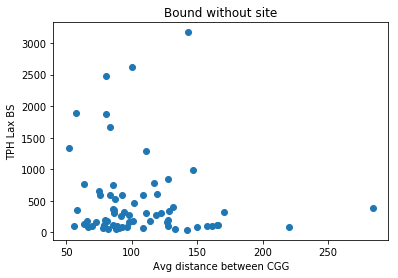

In [106]:
fig, ax = plt.subplots()
plt.plot(bound_cgg_nosite, tph_list, marker='o', linestyle="none")
#plt.plot(np.unique(unbound_cgg_site), np.poly1d(np.polyfit(unbound_cgg_site, tph_list, 1))(np.unique(unbound_cgg_site)))

ax.set_title("Bound without site")
ax.set_xlabel("Avg distance between CGG")
ax.set_ylabel("TPH Lax BS")

### Average distance between CGG for not bound

In [107]:
merge["avg_distance_Forward_notbound"].mean()

2417954.6956959236

In [108]:
merge["avg_distance_Reverse_notbound"].mean()

2261751.9207330118

In [109]:
merge["avg_distance_Forward_notbound"].std()

11561018.973006355

In [110]:
merge["avg_distance_Reverse_notbound"].std()

11182598.430167682

## Finding the best reading frame for CGG sites

In [158]:
max_cgg = []
num_cgg = []
for x in range (len(merge)):
    frame = 300
    start = 0
    del num_cgg[:]
    while(frame < merge["Sequence_length"][x]):
        num_cgg.append(merge["Sequence"][x][start:frame].count("CGG"))
        frame += 1
        start += 1
    max_cgg.append(max(num_cgg))

In [159]:
merge["Best_cgg"] = max_cgg

In [160]:
merge["Best_cgg_nosite"] = np.where(merge["Bound_gal4_no_site"].notnull(), merge["Best_cgg"], np.nan)
best_cgg_nosite = (merge["Best_cgg_nosite"]).tolist() 

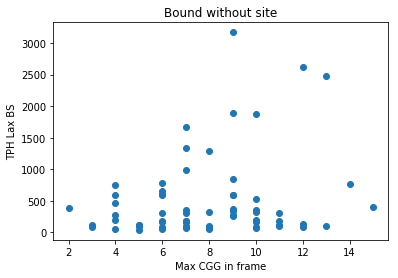

In [161]:
fig, ax = plt.subplots()
plt.plot(best_cgg_nosite, tph_list, marker='o', linestyle="none")
#plt.plot(np.unique(unbound_cgg_site), np.poly1d(np.polyfit(unbound_cgg_site, tph_list, 1))(np.unique(unbound_cgg_site)))

ax.set_title("Bound without site")
ax.set_xlabel("Max CGG in frame")
ax.set_ylabel("TPH Lax BS")

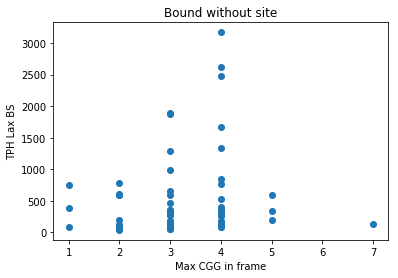

In [153]:
fig, ax = plt.subplots()
plt.plot(best_cgg_nosite, tph_list, marker='o', linestyle="none")
#plt.plot(np.unique(unbound_cgg_site), np.poly1d(np.polyfit(unbound_cgg_site, tph_list, 1))(np.unique(unbound_cgg_site)))

ax.set_title("Bound without site")
ax.set_xlabel("Max CGG in frame")
ax.set_ylabel("TPH Lax BS")

In [139]:
test_num_cgg = []
frame = 300
start = 0
while(frame < merge["Sequence_length"][1000]):
    test_num_cgg.append(merge["Sequence"][1000][start:frame].count("CGG"))
    frame += 1
    start += 1

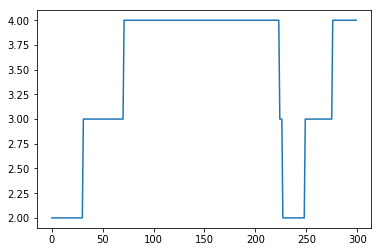

In [140]:
plt.plot(test_num_cgg)

In [130]:
merge["Sequence_length"][0]

1263

## Simulated model with sites

In [116]:
for x in range(100000):
    sample = merge.sample(bound_with_site_counts)
    site_sample_mean.append(sample["Max fold change"].mean())
    site_sample_median.append(sample["Max fold change"].median())

In [117]:
site_sample_average = np.mean(site_sample_mean)
site_sample_average

0.41144922511067222

In [118]:
site_sample_median_average = np.mean(site_sample_median)
site_sample_median_average

0.18043623934519051

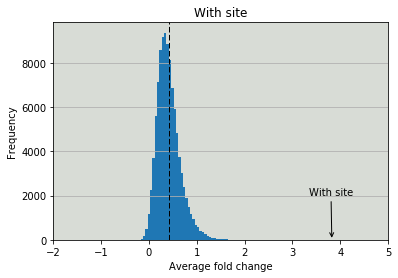

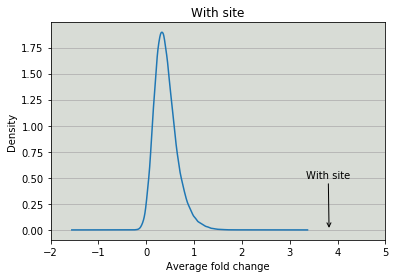

In [119]:
series = pd.DataFrame(site_sample_mean)
fig, ax = plt.subplots()
series.plot(kind='hist', bins=50, ax=ax, legend=False, title = "With site", xlim =[-2, 5])
ax.grid(axis='y')
ax.set_xlabel('Average fold change')
ax.set_facecolor('#d8dcd6')
ax.annotate("With site",
            xy=(mean_bound_with_site, 0), xycoords='data',
            xytext=(mean_bound_with_site-0.48, 2000), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),  
            )
plt.axvline(site_sample_average, color='k', linestyle='dashed', linewidth=1)

fig, ax = plt.subplots()
series.plot(kind='kde',ax=ax, legend=False, xlim=[-2,5], title = "With site")
ax.grid(axis='y')
ax.set_xlabel('Average fold change')
ax.set_facecolor('#d8dcd6')
ax.annotate("With site",
            xy=(mean_bound_with_site, 0), xycoords='data',
            xytext=(mean_bound_with_site-0.48, 0.5), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),  
            )


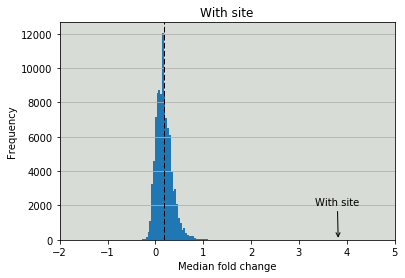

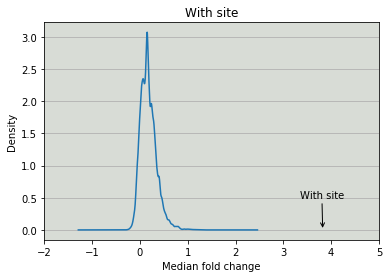

In [120]:
series3 = pd.DataFrame(site_sample_median)
fig, ax = plt.subplots()
series3.plot(kind='hist', bins=50, ax=ax, legend=False, title = "With site", xlim =[-2, 5])
ax.grid(axis='y')
ax.set_xlabel('Median fold change')
ax.set_facecolor('#d8dcd6')
ax.annotate("With site",
            xy=(mean_bound_with_site, 0), xycoords='data',
            xytext=(mean_bound_with_site-0.48, 2000), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),  
            )
plt.axvline(site_sample_median_average, color='k', linestyle='dashed', linewidth=1)

fig, ax = plt.subplots()
series3.plot(kind='kde',ax=ax, legend=False, xlim=[-2,5], title = "With site")
ax.grid(axis='y')
ax.set_xlabel('Median fold change')
ax.set_facecolor('#d8dcd6')
ax.annotate("With site",
            xy=(mean_bound_with_site, 0), xycoords='data',
            xytext=(mean_bound_with_site-0.48, 0.5), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),  
            )


## Simulated model without site

In [121]:
for x in range(100000):
    sample = merge.sample(bound_no_site_counts)
    nosite_sample_mean.append(sample["Max fold change"].mean())
    nosite_sample_median.append(sample["Max fold change"].median())

In [122]:
nosite_sample_median_average = np.mean(nosite_sample_median)
nosite_sample_median_average

0.16321061354578764

In [123]:
nosite_sample_average = np.mean(nosite_sample_mean)
nosite_sample_average

0.41067452069236382

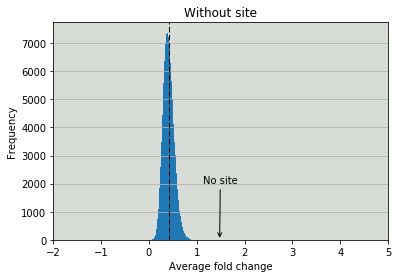

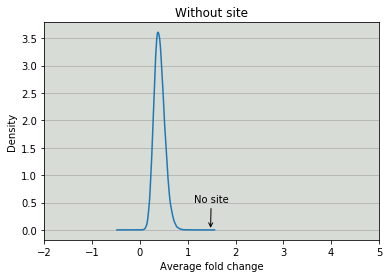

In [124]:
series2 = pd.DataFrame(nosite_sample_mean)
fig, ax = plt.subplots()
series2.plot(kind='hist', bins=50, ax=ax, legend=False, title = "Without site", xlim =[-2, 5])
ax.grid(axis='y')
ax.set_xlabel('Average fold change')
ax.set_facecolor('#d8dcd6')
ax.annotate("No site",
            xy=(mean_bound_without_site, 0), xycoords='data',
            xytext=(mean_bound_without_site-0.35, 2000), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),  
            )
plt.axvline(nosite_sample_average, color='k', linestyle='dashed', linewidth=1)

fig, ax = plt.subplots()
series2.plot(kind='kde',ax=ax, legend=False, xlim=[-2,5], title = "Without site")
ax.grid(axis='y')
ax.set_xlabel('Average fold change')
ax.set_facecolor('#d8dcd6')
ax.annotate("No site",
            xy=(mean_bound_without_site, 0), xycoords='data',
            xytext=(mean_bound_without_site-0.35, 0.5), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),  
            )

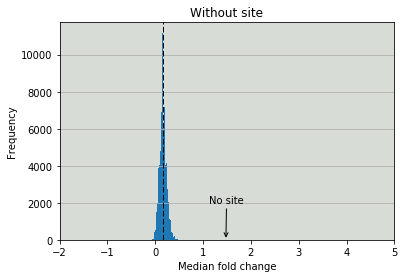

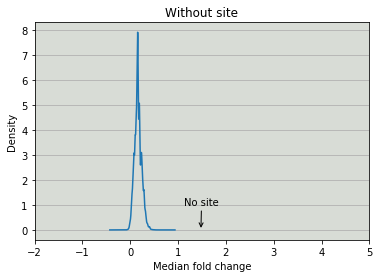

In [125]:
series4 = pd.DataFrame(nosite_sample_median)
fig, ax = plt.subplots()
series4.plot(kind='hist', bins=50, ax=ax, legend=False, title = "Without site", xlim =[-2, 5])
ax.grid(axis='y')
ax.set_xlabel('Median fold change')
ax.set_facecolor('#d8dcd6')
ax.annotate("No site",
            xy=(mean_bound_without_site, 0), xycoords='data',
            xytext=(mean_bound_without_site-0.35, 2000), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),  
            )
plt.axvline(nosite_sample_median_average, color='k', linestyle='dashed', linewidth=1)

fig, ax = plt.subplots()
series4.plot(kind='kde',ax=ax, legend=False, xlim=[-2,5], title = "Without site")
ax.grid(axis='y')
ax.set_xlabel('Median fold change')
ax.set_facecolor('#d8dcd6')
ax.annotate("No site",
            xy=(mean_bound_without_site, 0), xycoords='data',
            xytext=(mean_bound_without_site-0.35, 1), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),  
            )


In [155]:
merge.to_csv("Gal4_targets_seq_bindsites.txt", sep='\t')